<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Préparation des données</h1>
<br/>
<br/>
  

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 25px; color:rgb(47, 99, 220)">1- <u>reduction du nombre de variable de base_edu </u></h1>
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


print(os.getcwd())  # Répertoire actuel
#repertoire de la bd
url="/home/onyxia/work/Projet_Statistique/data/base_Edu.parquet"
#url="C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/Donnees/base_Edu.parquet"
base_Edu=pd.read_parquet(url)
base_Edu.head()

/home/onyxia/work/Projet_Statistique/Lisa


,unique_learner_id,days_between_signup_and_first_activity,days_between_order_and_first_activity,first_theory_activity_date,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,weekly_study_objective,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
0,3838161406066513919,41,0,2017-12-17 15:00:23.000000,265,0,3,0,3,<NA>,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
1,5829430568065349352,0,0,2022-07-07 12:02:53.000000,27,0,0,0,11,<NA>,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
2,7677180318050051984,787,788,2022-05-10 01:35:49.000000,295,0,0,0,73,240,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0
3,-5150597998144597550,615,616,2024-04-18 04:56:03.262330,138,0,0,0,75,<NA>,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
4,969323468959211246,169,170,2019-03-19 12:32:56.000000,554,0,0,0,41,120,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0


In [2]:
print(base_Edu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 477 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(72), boolean(254), datetime64[us](1), float64(150)
memory usage: 450.9 MB
None


La base de données compte donc 477 variables dont 72 de type Int, 254 de type boolean, 1 de type datetime et 150 de type float soit au total 254 variables qualitatives (**boolean**) et 221 variables quantitatives(**float + int** en excluant les identifiants) sans oublier la variable de type **datetime**.

Nous commencons par épurer la base données avant de passer à la réduction de dimension. On s'intéressera essentiellement ici aux données erronnées et valeurs manquantes. La nature de nos variables c'est à dire leur sens laisse supposer des valeurs négatives comme potentielles valeurs erronées pour nos variables numérique (int + float+ datetime). Aucune opération ne sera faite au niveau des booléen concernant les données erronées puisque leur type impose déjà les valeurs possibles. 

Interessons nous maintenant aux valeurs manquantes. 

In [3]:
missing_value=(base_Edu.isnull().sum()/len(base_Edu))
missing_value[missing_value>0]
missing_value[missing_value>0].describe()

count    404.000000
mean       0.743390
std        0.279055
min        0.047720
25%        0.666710
50%        0.842345
75%        0.918625
max        1.000000
dtype: float64

La base de données comporte donc 404 variables avec valeurs manquantes sur le total des 476 variables de la base ce qui n'est pas du tout négligeable. Voyons combien de valeurs manquantes at-on par type de variables. 

In [4]:
print(base_Edu.select_dtypes("int").isnull().any().sum()," variable de type int ont des valeurs manquantes")
print(base_Edu.select_dtypes("float").isnull().any().sum()," variable de type float ont des valeurs manquantes")
print(base_Edu.select_dtypes("boolean").isnull().any().sum()," variable de type boolean ont des valeurs manquantes")
print(base_Edu.select_dtypes("datetime").isnull().any().sum()," variable de type datetime ont des valeurs manquantes")

48  variable de type int ont des valeurs manquantes
103  variable de type float ont des valeurs manquantes
253  variable de type boolean ont des valeurs manquantes
0  variable de type datetime ont des valeurs manquantes


La seule variable de type datetime n'a donc pas de valeurs manquantes.  Analysons de plus près les proportions de valeurs manquantes des autres types

In [5]:
miss_bool=base_Edu.select_dtypes("boolean").isnull().sum()/len(base_Edu)
miss_bool[miss_bool>0].describe()

count    253.000000
mean       0.903116
std        0.072136
min        0.695085
25%        0.837765
50%        0.883305
75%        1.000000
max        1.000000
dtype: float64

Les variables de type boolean comporte pratiquement tous assez de valeurs manquantes avec un minimum de 69% et un maximum de 100% du total des observations

Les valeurs manquantes de la base ne sont pas complètement aléatoires. Elles ne sont pas pour la plupart le fruit d'une mauvaise collecte de données. La présence de valeurs manquantes dans cette base est due à diverses raisons notamment le fait que plusieurs individus de la base n'ont pas encore passé d'examen pour le permis. Plusieurs questions(variables) n'ont de sens que dans le cas où le premier examen est passé. Il y a donc une part d'information apporté par ces valeurs manquantes que nous devons inclure dans nos analyses. Pour les variables booléenne, nous pouvons régler ce prblème c'est à dire prendre en compte l'information apportée par ces valeurs manquantes en transformant les variables booléennes en variable catégorielles en considérant les valeurs manquantes comme une catégorie(True=1,False=0 et NA=2).

In [6]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs booléennes et <NA>
    return col.map(mapping)
colboo=base_Edu.select_dtypes("boolean").columns
for col in colboo:
    base_Edu[col] = encode_column_with_na(base_Edu[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories


Passons maintenant aux variables quantitatives (int+float)

In [7]:
miss_quant=base_Edu.select_dtypes(include=["int","float"]).isnull().sum()/len(base_Edu)
miss_quant[miss_quant>0].describe()

count    151.000000
mean       0.475770
std        0.292138
min        0.047720
25%        0.184915
50%        0.483995
75%        0.736010
max        0.941710
dtype: float64

Pour les variables quantitatives, la distribution des valeurs manquantes est plus étendue. On enregistre 151 variables qualitatives avec valeurs manquantes. On a un minimum de 4% et un maximum de 94% de valeurs manquantes par rapport au total d'observation(nous rappelons 200000 obervations). La nature des variables et la distribution des valeurs manquantes dans ce cas ne facilite pas la capture de l'information apportée par la présence de ces valeurs manquantes. On pourrait opter pour une imputation par KNN ou par imputation itérative (MICE) mais cela risque de modifier et significativement les corrélations existant déjà entre les variables introduisant ainsi un important biais et au vue de la taille de l'echantillon, cela demanderait un temps d'excution énorme. On choisit ici donc de procéder à une imputation par la médiane après suppression des variables avant un taux élevé de valeurs manquantes pour minimiser le biais. Cela permettra de ne pas trop distordre les distributions existentes.

In [8]:
miss_quant[miss_quant<=0.20].describe()

count    118.000000
mean       0.054362
std        0.074368
min        0.000000
25%        0.000000
50%        0.000000
75%        0.106310
max        0.194530
dtype: float64

Nous choisissons le seuil de 20% de valeurs manquantes. Ce seuil nous parait raisonnable puisqu'il est relativement faible et n'entraine pas la suppression d'un grand nombre de variables quantitatives (118 sont conservées sur un total de 151)

In [9]:
#suppression des variables avec plus de 20% de valeurs manquantes
base_Edu=base_Edu.drop(columns=miss_quant[miss_quant>0.20].index)
#Imputation par la médiane
col=base_Edu.select_dtypes(exclude='category').columns
base_Edu[col] = base_Edu[col].fillna(base_Edu[col].median())

In [10]:
base_Edu.isnull().any().sum()
base_Edu.to_csv("base_Edu_reduced.csv", index=False)
base_Edu.head()

,unique_learner_id,days_between_signup_and_first_activity,days_between_order_and_first_activity,first_theory_activity_date,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,is_first_exam_success,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
0,3838161406066513919,41,0,2017-12-17 15:00:23.000000,265,0,3,0,3,0,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
1,5829430568065349352,0,0,2022-07-07 12:02:53.000000,27,0,0,0,11,2,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
2,7677180318050051984,787,788,2022-05-10 01:35:49.000000,295,0,0,0,73,0,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0
3,-5150597998144597550,615,616,2024-04-18 04:56:03.262330,138,0,0,0,75,2,...,0,0,0,0,0,1,0.0,0.0,0.0,100.0
4,969323468959211246,169,170,2019-03-19 12:32:56.000000,554,0,0,0,41,2,...,0,0,0,1,0,0,0.0,100.0,0.0,0.0


Plus aucune valeur manquante. La base de données enfin prête, on peut passer aux opérations de réduction de dimension

## ACP

Pour l'ACP, Nous allons tout dabord nous restreindre à un echantillon de la base pour réduire le temps de calcul, ensuite nous allons sélectionner les variables continues (int + float) et supprimer la variable des identifiants.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [12]:
data=base_Edu.iloc[:5000,:]
data=data.select_dtypes(include=["int","float"])
data=data.drop(["unique_learner_id"], axis=1)

Par la suite, nous allons standardiser les variables afin de faire qu'elles aient toutes la même échelle car l'ACP dépend fortement de l'échelle des variables.

In [13]:
scaler =StandardScaler()
X_scaled =scaler.fit_transform(data)

### Choix du nombre de composantes principales

Text(0.5, 0, 'Composantes principales')

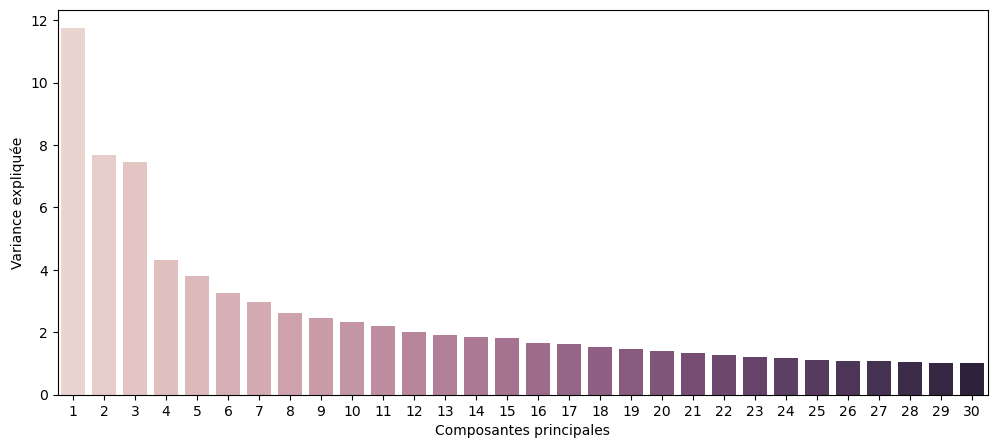

In [14]:
plt.figure(figsize=(12, 5))
pca=PCA(n_components=30)
pca.fit(X_scaled)
sns.barplot(x= np.arange(1,31) , y=pca.explained_variance_ratio_*100, hue=np.arange(1,31), legend=False)
plt.ylabel("Variance expliquée")
plt.xlabel("Composantes principales")

En exécutant l'ACP on constate que la première composante principale explique 11,74% de la variance totale, la deuxième en explique 7,70%, et la troisième 7,46%. A partir de la douzième composante principale, la variance expliquée par chacune d'elle devient inférieure à 2%. On ira donc pas au dela de 12 composantes principales.

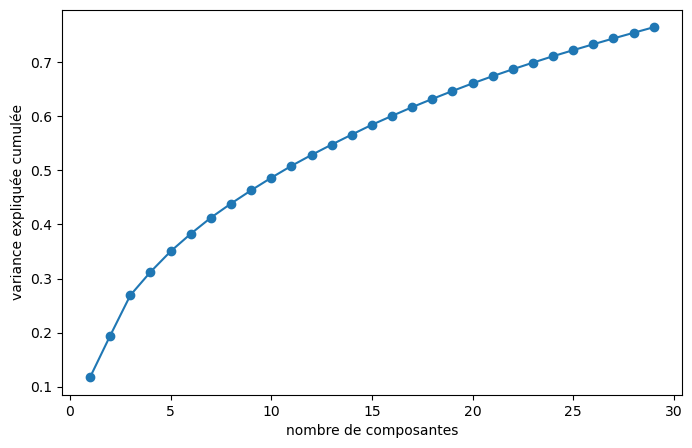

In [15]:
explained_variances=[]
for n in range(1,30):
    pca =PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,5))
plt.plot(range(1,30), explained_variances, marker='o')
plt.xlabel("nombre de composantes")
plt.ylabel("variance expliquée cumulée")
plt.show()


Le graphique des variances expliquées cumulées montre que les 3 premières composantes principales expliquent environ 30% de l'information. Et les 10 premières composantes expliquent environ 49% de la variance totale. Afin de se limiter à un nombre rationnel de composantes interprétable, nous allons considérer 10 composantes principales pour la suite.

In [16]:
pca = PCA(n_components=10)
#Appliquer l'ACP
X_pca = pca.fit_transform(X_scaled)
print("Variance expliquée par chaque composante :",pca.explained_variance_ratio_)
print("Variance cumulée :",pca.explained_variance_ratio_.sum())

Variance expliquée par chaque composante : [0.11749143 0.07697459 0.07462499 0.04303839 0.03809501 0.03245481
 0.02980991 0.02610981 0.02449229 0.02320605]
Variance cumulée : 0.4862972848505539


In [17]:
print("Composantes principales (coefficients) :")
table_coef=pd.DataFrame(pca.components_, columns=data.select_dtypes(exclude='category').columns)
table_coef

Composantes principales (coefficients) :


,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,percentage_activities_2_3_4h_week,percentage_activities_5_6_7h_week,percentage_activities_23_0_1h_week,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
0,0.063255,0.076404,-0.011919,5.551115e-17,0.116699,0.120061,0.145596,-0.010784,0.008426,0.007295,...,0.119344,0.121008,0.119724,0.085572,0.015172,-0.003517,0.085709,0.073073,0.014351,-0.084125
1,-0.007195,-0.006782,-0.004885,1.387779e-17,0.062476,0.036569,0.018555,0.001365,-0.001249,0.008330,...,0.309000,0.300895,0.288262,0.024419,-0.000772,0.015621,0.215397,-0.060518,-0.001555,0.034601
2,0.020202,0.030754,-0.035429,-1.110223e-16,0.045099,-0.061566,0.049350,-0.002932,0.012160,-0.014768,...,-0.066602,-0.065561,-0.064715,-0.018888,-0.003433,0.089204,-0.046731,-0.114083,-0.003859,0.119110
3,-0.008700,0.008217,0.092779,-8.326673e-17,0.182665,0.004806,0.302469,-0.001204,0.005517,0.012067,...,-0.045762,-0.041474,-0.038662,0.091374,-0.010445,0.132132,-0.052224,-0.028738,-0.010927,0.034369
4,0.127740,0.094890,0.406915,-5.551115e-17,-0.002015,-0.019222,0.015335,0.003556,0.021622,0.016021,...,-0.002981,-0.000970,-0.002263,0.027118,-0.004278,-0.001282,-0.004919,0.053986,-0.004726,-0.053153
5,0.148674,0.137129,-0.076351,0.000000e+00,-0.010126,-0.017517,0.050915,0.001945,-0.004979,0.071756,...,-0.013333,-0.015367,-0.014865,0.062593,0.005775,-0.175047,0.016972,0.280154,0.003682,-0.281215
6,0.242903,0.286622,-0.025862,-1.110223e-16,-0.057564,-0.051589,-0.007060,0.009397,0.015495,0.057526,...,-0.009429,-0.002754,-0.005922,-0.022231,-0.044735,-0.026009,0.012281,-0.009665,-0.044163,0.008516
7,0.016607,0.038740,-0.036460,2.775558e-17,-0.187295,0.001063,-0.239306,0.008987,0.017110,-0.010429,...,0.011361,0.009359,0.005682,-0.143061,-0.013907,-0.041137,0.024945,-0.076109,-0.014146,0.073816
8,0.016277,0.017758,0.074961,-4.336809e-19,-0.069110,-0.118648,-0.089075,-0.008548,-0.007088,0.025661,...,0.012772,0.001528,0.001600,-0.122101,-0.066118,-0.026412,0.053773,-0.079376,-0.066490,0.075162
9,-0.034539,-0.031072,-0.112366,-8.500145e-17,0.066331,-0.047909,0.059517,-0.045523,-0.079856,-0.006621,...,-0.009816,-0.007852,-0.012993,-0.185109,-0.137310,0.169174,0.061475,-0.293188,-0.137142,0.287931


In [18]:
# cosinus carré, peut-être à supprimer
cos_squared=np.square(pca.components_)
df_cos_squared=pd.DataFrame(cos_squared, columns=data.columns)
df_cos_squared.index=["PC{}".format(i+1) for i in np.arange(0,10)]
df_cos_squared

,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,percentage_activities_2_3_4h_week,percentage_activities_5_6_7h_week,percentage_activities_23_0_1h_week,...,nb_weeks_weekly_study_objective_reached_80pct,nb_weeks_weekly_study_objective_reached_75pct,nb_weeks_weekly_study_objective_reached_70pct,nb_weeks_weekly_study_objective_not_reached,nb_weeks_no_activity,nb_weeks_no_weekly_study_objective,pct_study_objective_reached,pct_study_objective_not_reached,pct_study_objective_no_activity,pct_no_objective_weeks
PC1,0.004001,0.005838,0.000142,3.081488e-33,0.013619,0.014415,0.021198,0.000116,0.000071,0.000053,...,0.014243,1.464299e-02,0.014334,0.007323,2.301753e-04,0.000012,0.007346,0.005340,0.000206,0.007077
PC2,0.000052,0.000046,0.000024,1.925930e-34,0.003903,0.001337,0.000344,0.000002,0.000002,0.000069,...,0.095481,9.053766e-02,0.083095,0.000596,5.966660e-07,0.000244,0.046396,0.003662,0.000002,0.001197
PC3,0.000408,0.000946,0.001255,1.232595e-32,0.002034,0.003790,0.002435,0.000009,0.000148,0.000218,...,0.004436,4.298207e-03,0.004188,0.000357,1.178651e-05,0.007957,0.002184,0.013015,0.000015,0.014187
PC4,0.000076,0.000068,0.008608,6.933348e-33,0.033366,0.000023,0.091488,0.000001,0.000030,0.000146,...,0.002094,1.720132e-03,0.001495,0.008349,1.090990e-04,0.017459,0.002727,0.000826,0.000119,0.001181
PC5,0.016317,0.009004,0.165580,3.081488e-33,0.000004,0.000369,0.000235,0.000013,0.000467,0.000257,...,0.000009,9.403655e-07,0.000005,0.000735,1.829833e-05,0.000002,0.000024,0.002914,0.000022,0.002825
PC6,0.022104,0.018804,0.005829,0.000000e+00,0.000103,0.000307,0.002592,0.000004,0.000025,0.005149,...,0.000178,2.361527e-04,0.000221,0.003918,3.334771e-05,0.030641,0.000288,0.078486,0.000014,0.079082
PC7,0.059002,0.082152,0.000669,1.232595e-32,0.003314,0.002661,0.000050,0.000088,0.000240,0.003309,...,0.000089,7.585664e-06,0.000035,0.000494,2.001235e-03,0.000676,0.000151,0.000093,0.001950,0.000073
PC8,0.000276,0.001501,0.001329,7.703720e-34,0.035079,0.000001,0.057268,0.000081,0.000293,0.000109,...,0.000129,8.759353e-05,0.000032,0.020467,1.933965e-04,0.001692,0.000622,0.005793,0.000200,0.005449
PC9,0.000265,0.000315,0.005619,1.880791e-37,0.004776,0.014077,0.007934,0.000073,0.000050,0.000658,...,0.000163,2.334960e-06,0.000003,0.014909,4.371641e-03,0.000698,0.002891,0.006301,0.004421,0.005649
PC10,0.001193,0.000965,0.012626,7.225247e-33,0.004400,0.002295,0.003542,0.002072,0.006377,0.000044,...,0.000096,6.165812e-05,0.000169,0.034265,1.885415e-02,0.028620,0.003779,0.085959,0.018808,0.082904


In [19]:
#Aucune des variables n'a un cosinus carré supérieur à 0,5, donc ces variables ne sont pas bien représenter dans l'hyperplan factoriel
df_cos_squared.sum()[df_cos_squared.sum()>=0.2]

days_between_first_and_last_activities    0.201682
n_activity_per_session_avg                0.299207
n_activity_per_session_std                0.229757
n_activity_per_session_median             0.227394
minutes_between_sessions_min              0.231539
minutes_between_sessions_max              0.211747
minutes_between_sessions_avg              0.254589
minutes_between_sessions_median           0.235782
score_pct__standard_deviation             0.231954
score_pct__variation_coefficient          0.208696
pct_study_objective_not_reached           0.202390
dtype: float64

In [20]:
# contribution
loadings=pca.components_.T
eigenvalues=pca.explained_variance_
contributions=(loadings**2)*eigenvalues
contrib_percent=contributions/eigenvalues*100
contrib_df=pd.DataFrame(contrib_percent, columns=["PC{}".format(i+1) for i in np.arange(0,10)])
contrib_df.index=data.columns

In [21]:
contrib_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
days_between_signup_and_first_activity,4.001228e-01,5.176148e-03,4.081347e-02,7.569351e-03,1.631743e+00,2.210399,5.900167e+00,2.757886e-02,2.649486e-02,1.192964e-01
days_between_order_and_first_activity,5.837600e-01,4.598911e-03,9.457872e-02,6.752283e-03,9.004150e-01,1.880437,8.215227e+00,1.500826e-01,3.153560e-02,9.654493e-02
days_between_first_and_last_activities,1.420600e-02,2.386748e-03,1.255238e-01,8.607863e-01,1.655796e+01,0.582940,6.688666e-02,1.329325e-01,5.619192e-01,1.262613e+00
chapter_before_success_count,3.081488e-31,1.925930e-32,1.232595e-30,6.933348e-31,3.081488e-31,0.000000,1.232595e-30,7.703720e-32,1.880791e-35,7.225247e-31
serie_before_success_count,1.361863e+00,3.903217e-01,2.033933e-01,3.336639e+00,4.058597e-04,0.010254,3.313586e-01,3.507933e+00,4.776153e-01,4.399783e-01


### Interprétation des composantes principales

In [58]:
contrib1=pd.DataFrame(data=contrib_df["PC1"].sort_values(ascending=False)[:18].values, columns=["contribution"]) #pas terminé
contrib1.index=contrib_df["PC1"].sort_values(ascending=False)[:18].index
contrib1["coefficient"]=table_coef[contrib1.index].iloc[0]
contrib1

,contribution,coefficient
notions_diverses_number_of_activities,4.540716,0.213090
mecanique_equipements_number_of_activities,4.500077,0.212134
securite_number_of_activities,4.333336,0.208167
route_number_of_activities,4.314875,0.207723
prendre_quitter_vehicule_number_of_activities,4.300245,0.207370
autres_usagers_number_of_activities,4.261744,0.206440
premiers_secours_number_of_activities,4.220904,0.205448
environnement_number_of_activities,4.052664,0.201312
conducteur_number_of_activities,3.853331,0.196299
score_pct__quantile__q_0_4,3.189219,0.178584


Les variables qui contribuent le plus à la construction de la première composante principales sont des variables qui renseigne sur le nombre d'activité effectuer par thématique pour le permis de conduire (*notions_diverses_number_of_activities*, *mecanique_equipements_number_of_activities*,*securite_number_of_activities*, *route_number_of_activities*, *prendre_quitter_vehicule_number_of_activities*, *autres_usagers_number_of_activities*,etc.) et les statistiques qui résultent des scores en pourcentage obtenus aux différents examens notamment les quantiles d'ordre 1, 2, 3 et 4 (*score_pct__quantile__q_0_1*, *score_pct__quantile__q_0_2*, *score_pct__quantile__q_0_3*, *score_pct__quantile__q_0_4*), et .... Cet axe résume le signal et/ou la corrélation qui existe entre le nombre d'activités effectués par thématique et la distribution du score au différents examens. On pourrait donc dire qu'il traduit l'**efficacité** des étudiants.

De plus, en analysant les coefficients de ces variables, ont constate qu'elles sont toutes positifs. Ainsi, un individu ayant un coefficient élevé sur cet axe, fait beaucoup d'activité sur les différentes thématiques d'apprentissage, ce qui résulte par des scores élevés aux différents examens.

In [62]:
contrib2=pd.DataFrame(data=contrib_df["PC2"].sort_values(ascending=False)[:9].values, columns=["contribution"]) 
contrib2.index=contrib_df["PC2"].sort_values(ascending=False)[:9].index
contrib2["coefficient"]=table_coef[contrib2.index].iloc[1]
contrib2

,contribution,coefficient
nb_weeks_weekly_study_objective_reached_90pct,9.884285,0.314393
nb_weeks_weekly_study_objective_reached_85pct,9.845562,0.313776
nb_weeks_weekly_study_objective_reached_95pct,9.789423,0.312881
nb_weeks_weekly_study_objective_reached_80pct,9.548105,0.309000
nb_weeks_weekly_study_objective_reached_99pct,9.436497,0.307189
nb_weeks_weekly_study_objective_reached,9.383735,0.306329
nb_weeks_weekly_study_objective_reached_75pct,9.053766,0.300895
nb_weeks_weekly_study_objective_reached_70pct,8.309513,0.288262
pct_study_objective_reached,4.639599,0.215397


Les variables qui contribuent fortement à la deuxième composante principale sont d'une part les variables qui renseignent sur le nombre de week-end où les objectifs d'étude hebdomadaire ont atteint un pourcentage donnée (90%,85%,95%,99%,75%,etc) et d'autre part les variables qui donnent le pourcentage d'objectifs d'études atteint le week-end (*nb_weeks_weekly_study_objective_reached*) et en dehors (*pct_study_objective_reached*). On pourrait dire que cet axe capture principalement l'information sur **l'intensité du travail personnel des étudiants**. 

De plus, le coefficient de toutes les variables qui contribuent le plus à la formation de l'axe 2 sont positifs. Donc, les individus qui ont un coefficient élevé positif sur cet axe (se trouvant à une extrémité de l'axe) sont beaucoup investit personnellement dans la formation.

In [61]:
contrib3=pd.DataFrame(data=contrib_df["PC3"].sort_values(ascending=False)[:8].values, columns=["contribution"]) #pas terminé
contrib3.index=contrib_df["PC3"].sort_values(ascending=False)[:8].index
contrib3["coefficient"]=table_coef[contrib3.index].iloc[2]
contrib3 #pas terminé

,contribution,coefficient
score_pct__quantile__q_0_2,6.812823,0.261014
score_pct__quantile__q_0_3,6.719304,0.259216
score_pct__quantile__q_0_1,6.555710,0.256041
score_pct__quantile__q_0_4,6.460656,0.254178
score_pct__linear_trend__attr_intercept,5.967775,0.244290
score_pct__c3__lag_1,5.488865,0.234283
score_pct__c3__lag_2,5.127570,0.226441
score_pct__c3__lag_3,4.963671,0.222793


Les variables qui contribuent fortement à la 3e composante principale sont les variables qui caractérisent la distribution du score en pourcentage (notamment les quantiles et ...) aux différents examens renseignées pour chaque étudiant. On peut dire que cet axe capture l'information sur **la progression des étudiants en terme de résultats**. 

De plus, le fait que toutes ces variables ont un coefficient positif sur l'axe signifient qu'elles varient dans le même sens que l'axe. Donc un étudiant ayant un coefficient très faible (négatif) sur cet axe, obtient de mauvais résultats aux différents examens, ce qui traduit le fait qu'ils n'assimilent pas bien les connaissances.

In [64]:
contrib4=pd.DataFrame(data=contrib_df["PC4"].sort_values(ascending=False)[:8].values, columns=["contribution"]) #pas terminé
contrib4.index=contrib_df["PC4"].sort_values(ascending=False)[:8].index
contrib4["coefficient"]=table_coef[contrib4.index].iloc[3]
contrib4

,contribution,coefficient
score_pct__standard_deviation,10.359678,0.321865
score_pct__minimum,10.058443,-0.317150
nb_failed_series,9.904767,0.314718
theory_activities_total,9.148774,0.302469
score_pct__variation_coefficient,9.129085,0.302144
session_count,9.085732,0.301425
nb_exam_series,4.575826,0.213912
serie_before_success_count,3.336639,0.182665


La mesure de la dispersion du score (*score_pct_standard_deviation*)  et le minimum du score en pourcentage (*score_pct_minimum*) aux différentes examens contribuent majoritairement à la formation de la 4e composante principale. Aussi, le nombre d'examens échoués (*nb_failed_series*), le total d'activités théorique (*theory_activities_total*), la variation relative du score en pourcentage autour de la moyenne (*score_pct__variation_coefficient*), le nombre de session effectué (*session_count*), le nombre d'examen effectué (*nb_exam_series*), le nombre d'examen composé avant le premier succès (*serie_before_success_count*) contribuent également fortement à la formation de cet axe. Cette composante semble donc être fortement influencé par des variables liées à **la performance académique, à la régularité et à la difficulté des examens**. 

De l'analyse des coefficients de ces variables, on observe que seule la variable qui donne le minimum du score en pourcentage a une coefficient négatif. On pourrait donc dire que les individus ayant un score élevé sur cette composante sont succeptibles d'avoir des performances très irrégulières (caractérisées par un **score_pct_standard_deviation** et **score_pct__variation_coefficient** élevés), rencontrent régulièrement des échecs et mettent du temps à assimiler les compétences (**nb_failed_series**,**score_pct__minimum**,**serie_before_success_count**), ce qui impliquent qu'ils doivent faire plus d'activités, d'examen et de session (**theory_activities_total**,**session_count**,**nb_exam_series**). 

In [67]:
contrib5=pd.DataFrame(data=contrib_df["PC5"].sort_values(ascending=False)[:7].values, columns=["contribution"]) #pas terminé
contrib5.index=contrib_df["PC5"].sort_values(ascending=False)[:7].index
contrib5["coefficient"]=table_coef[contrib5.index].iloc[4]
contrib5

,contribution,coefficient
minutes_between_sessions_max,18.311655,0.427921
days_between_first_and_last_activities,16.557962,0.406915
minutes_between_sessions_avg,13.814557,0.371679
minutes_between_sessions_std,12.234506,0.349779
learning_duration_hours,9.652955,0.310692
minutes_between_sessions_median,6.575278,0.256423
minutes_between_sessions_min,5.901130,0.242922


Le maximum (*minutes_between_sessions_max*), la moyenne (*minutes_between_sessions_avg*), l'écart type (*minutes_between_sessions_std*), la médiane(*minutes_between_sessions_median*), le minimum (*minutes_between_sessions_min*) ainsi que le nombre d'heures d'apprentissage (*learning_duration_hours*), qui mesurent **la régularité et la concentration des sessions d'apprentissage** contribuent fortement à la formation de la cinquième composante principale. Egalement, le nombre de jour entre la première activité et la dernière activité (*days_between_first_and_last_activities*) qui mesure **l'engagement totale de l'étudiant dans la formation**, contribue fortement à la formation de cet axe.

Les coefficients de ces variables sont tous positifs, ce qui signifie que la composante varie dans le même sens que ces variables. Donc, les individus ayant un coefficient positif élevé sur cet axe (se situant à une extrémité de l'axe) ont une formation étalée sur une longue période, des sessions d'apprentissage très irrégulières, avec de longues périodes d'inactivité entre chaque session (un écart type élevé suggère des sessions très espacées dans le temps, et une médiane élevée indique des sessions moins fréquentes).

In [71]:
# interpretation à revoir
contrib6=pd.DataFrame(data=contrib_df["PC6"].sort_values(ascending=False)[:8].values, columns=["contribution"]) #pas terminé
contrib6.index=contrib_df["PC6"].sort_values(ascending=False)[:8].index
contrib6["coefficient"]=table_coef[contrib6.index].iloc[5]
contrib6

,contribution,coefficient
n_activity_per_session_avg,10.684302,0.326869
percentage_serie_theme,8.892304,0.298200
n_activity_per_session_median,8.253407,0.287287
pct_no_objective_weeks,7.908194,-0.281215
pct_study_objective_not_reached,7.848642,0.280154
n_activity_per_session_std,7.410871,0.272229
ratio_serie_chapter_avg,3.332410,-0.182549
nb_weeks_no_weekly_study_objective,3.064135,-0.175047


La moyenne (*n_activity_per_session_avg*), médiane (*n_activity_per_session_median*) et l'écart type (*n_activity_per_session_std*) du nombre d'activité par session, le pourcentage de series par thème (*percentage_serie_theme*), le pourcentage de week-end où l'étudiant n'avais aucun objectif d'étude (*pct_no_objective_weeks*), le pourcentage d'objectifs d'étude non atteint (*pct_study_objective_not_reached*), le nombre de chapitre par session en moyenne (*ratio_serie_chapter_avg*), le nombre de week-end où l'étudiant n'avait aucun objectif d'étude hebdomadaire (*nb_weeks_no_weekly_study_objective*) contribuent le plus à la formation de la sixième composante principale. Ces variables traduisent **l'engagement des étudiants** dans leur apprentissage.

En analysant le coefficient de ces variables, ont constate que les variables *pct_no_objective_weeks*, *ratio_serie_chapter_avg*, *nb_weeks_no_weekly_study_objective* ont des coefficients négatifs, ce qui signifient qu'ils varient dans le sens contraire de celui de la sixième composante principale. Donc les individus ayant des coefficients élevés positives sur cet axe font en moyenne un nombre élevé d'activité par session, se fixent des objectifs d'étude le week-end régulièrement mais atteignent rarement leur objectifs, étudient très peu de chapitre par série.

In [73]:
contrib7=pd.DataFrame(data=contrib_df["PC7"].sort_values(ascending=False)[:10].values, columns=["contribution"]) #pas terminé
contrib7.index=contrib_df["PC7"].sort_values(ascending=False)[:10].index
contrib7["coefficient"]=table_coef[contrib7.index].iloc[6]
contrib7

,contribution,coefficient
days_between_order_and_first_activity,8.215227,0.286622
minutes_between_sessions_median,7.352200,-0.271149
minutes_between_sessions_min,7.273138,-0.269688
minutes_between_sessions_avg,6.353469,-0.252061
days_between_signup_and_first_activity,5.900167,0.242903
route_learning_duration_hours,4.719930,0.217254
autres_usagers_learning_duration_hours,4.284439,0.206989
securite_learning_duration_hours,4.062286,0.201551
conducteur_learning_duration_hours,3.831024,0.195730
notions_diverses_learning_duration_hours,3.672685,0.191643


Le nombre de jour entre le payement de la formation et la première activité (*days_between_order_and_first_activity*), la médiane (*minutes_between_sessions_median*), le minimum(*minutes_between_sessions_min*) et la moyenne (*minutes_between_sessions_avg*) du nombre de minutes par session, le nombre de jour entre l'inscription et la première activité (*days_between_signup_and_first_activity*), la durée d'apprentissage en heures des différents thèmes: la route (*route_learning_duration_hours*), la sécurité (*securite_learning_duration_hours*), conducteur (*conducteur_learning_duration_hours*), notions diverses (*notions_diverses_learning_duration_hours*), autres usagers (*autres_usagers_learning_duration_hours*) contribuent fortement à la formation de la septième composante principale. Ces variables mesurent **la régularité aux sessions et l'investissement de l'étudiant dans la formation**.

L'analyse des coefficients de ces variables montrent que les variables qui mesurent la médiane, la moyenne et le minimum du nombre de minutes entre les sessions ont des coefficients négatifs, ce qui signifient qu'elles varient dans le sens contraire de celui de la composante principale. On peut donc dire que les individus ayant un coefficient élevé pour cette composante mettent long avant d'effectuer leur première activité après l'inscription et aussi après le paiement (ce qui pourrait indiquer un manque d'enthousiasme initial ou des contraintes externes), prennent plus de temps pour apprendre les différentes thème du processus d'apprentissage (soit par un manque d'enthousiasme ou d'investissement de leur part, soit à cause de contraintes externes) ont un faible nombre de minutes entre les sessions (#minutes entre les sessions de quoi#).

In [ ]:
contrib8=pd.DataFrame(data=contrib_df["PC8"].sort_values(ascending=False)[:10].values, columns=["contribution"]) 
contrib8.index=contrib_df["PC8"].sort_values(ascending=False)[:10].index
contrib8["coefficient"]=table_coef[contrib8.index].iloc[7]
contrib8

,contribution,coefficient
score_pct__standard_deviation,8.502869,0.291597
nb_failed_series,6.565056,-0.256224
score_pct__variation_coefficient,6.235712,0.249714
score_pct__mean_change,5.903319,0.242967
theory_activities_total,5.726757,-0.239306
score_pct__mean_abs_change,5.261939,0.229389
score_pct__linear_trend__attr_slope,5.259194,0.229329
score_pct__skewness,3.562296,-0.188740
serie_before_success_count,3.507933,-0.187295
session_count,3.384200,-0.183962


Les variables qui contribuent le plus à la formation de la 8e composante principale sont: la dispersion du pourcentage du score aux examens (*score_pct__standard_deviation*), le nombre de series échoués (*nb_failed_series*), la variation du pourcentage du score autour de la moyenne (*score_pct__variation_coefficient*), la moyenne des scores (*score_pct__mean_change*), le nombre total d'activités théoriques effectué (*theory_activities_total*), le changement moyen du score en valeur absolue (*score_pct__mean_abs_change*), la pente de la droite de regression linéaire obtenue avec les données sur les scores aux examens pour chaque étudiants (*score_pct__linear_trend__attr_slope*), le coefficient d'asymétrie du score (*score_pct__skewness*), le nombre de series effectué avant le premier succès (*serie_before_success_count*), le nombre de session effectué (*session_count*). On pourrait donc dire que cette composante capture **les difficultés et les variations dans le parcours d'apprentissage des étudiants.**

En analysant les coefficients de ces variables ont remarque que certaines ont des coefficients négatives sur l'axe, donc varient dans le sens contraire de celui-ci. Ainsi, un individu avec un coefficient élevé et positif sur cet axe a des scores très dispersés avec une variation forte autour de la moyenne, ce qui se traduit par un changement moyen du score élevé. Aussi le coefficient d'asymétrie du score est négatif, ce qui traduit une asymétrie à gauche, c'est-à-dire que cet individu a un score élevé sur la majorité des examens. De plus, il échoue moins de séries et il a échoué un faible nombre de série avant son premier succès ce qui signifie qu'il assimile bien et par conséquent fais moins d'activités théoriques.

Cette axe pourrait être utilisée pour identifier les étudiants à risque et leur proposer un soutien personnalisé.

In [76]:
contrib9=pd.DataFrame(data=contrib_df["PC9"].sort_values(ascending=False)[:6].values, columns=["contribution"]) #pas terminé
contrib9.index=contrib_df["PC9"].sort_values(ascending=False)[:6].index
contrib9["coefficient"]=table_coef[contrib9.index].iloc[8]
contrib9

,contribution,coefficient
score_pct__first_location_of_minimum,9.137052,0.302276
n_activity_per_session_avg,7.475982,0.273422
n_activity_per_session_std,5.831038,0.241475
n_activity_per_session_median,5.416192,0.232727
score_pct__last_location_of_minimum,4.978628,0.223128
session_count,3.887924,-0.197178


In [78]:
contrib10=pd.DataFrame(data=contrib_df["PC10"].sort_values(ascending=False)[:9].values, columns=["contribution"]) #pas terminé
contrib10.index=contrib_df["PC10"].sort_values(ascending=False)[:9].index
contrib10["coefficient"]=table_coef[contrib10.index].iloc[9]
contrib10

,contribution,coefficient
n_activity_per_session_avg,9.223566,0.303703
pct_study_objective_not_reached,8.595947,-0.293188
pct_no_objective_weeks,8.290428,0.287931
n_activity_per_session_median,7.692265,0.277349
n_activity_per_session_std,6.046950,0.245905
minutes_between_sessions_min,4.357118,0.208737
minutes_between_sessions_median,4.116334,0.202888
nb_weeks_weekly_study_objective_not_reached,3.426528,-0.185109
percentage_serie_exam,3.255092,-0.180419


Les variables qui contribuent le plus à la formation de la 10e composante principale sont: le nombre moyen, la médiane et l'écart-type d'activité par session (*n_activity_per_session_avg*, *n_activity_per_session_median*, *n_activity_per_session_std*), le pourcentage d'objectif d'étude non atteint (*pct_study_objective_not_reached*), pourcentage de semaines sans objectifs d'étude (*pct_no_objective_weeks*), le minimum et la médiane du nombre de minutes entre les sessions (*minutes_between_sessions_min*, *minutes_between_sessions_median*), nombre de semaine ou les objectifs d'étude hebdomadaire n'ont pas été atteint (*nb_weeks_weekly_study_objective_not_reached*), le pourcentage de serie effectué (*percentage_serie_exam*). On pourrait donc dire que cette composante capture **la planification et l'engagement dans la formation**. Elle semble refléter la capacité de l'étudiant à maintenir un rythme d'étude régulier, à se fixer et à atteindre des objectifs, et à s'engager activement dans ses sessions d'étude.

En analysant les coefficients de ces variables, on observe que les variables *pct_study_objective_not_reached*, *nb_weeks_weekly_study_objective_not_reached* et *percentage_serie_exam* ont des coefficients négatifs sur cet axe. Donc les étudiants ayant un coefficient élevé et positif sur cet axe effectuent un nombre élevé d'activités par session avec une forte dispersion entre les sessions, n'ont pas régulièrement des objectifs d'étude hebdomadaire (ce qui peut être du à de la paresse ou des contraintes externes), mais lorsqu'ils en ont, il les respectent dans la majorité des cas. Egalement, ils font des sessions régulièrement.

### SPARSE PCA

In [42]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(n_components=30, random_state=0)
transformer.fit(X_scaled)


KeyboardInterrupt: 

In [51]:
transformer.components_[4]

array([ 0.00000000e+00, -2.88262669e-02,  5.18179938e-01,  0.00000000e+00,
        0.00000000e+00, -5.24796130e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.24898565e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.25421427e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.40344928e-02,  

In [45]:
dict0={"Var":data.columns, "Coef":transformer.components_[0]}
comp0=pd.DataFrame(dict0)
comp0[comp0["Coef"]!=0]

,Var,Coef
5,quiz_before_success_count,0.069423
6,theory_activities_total,0.002130
43,autres_usagers_number_of_activities,0.328751
45,circulation_routiere_number_of_activities,0.216885
47,conducteur_number_of_activities,0.284036
49,environnement_number_of_activities,0.317239
51,mecanique_equipements_number_of_activities,0.330497
52,mecanique_equipements_learning_duration_hours,0.008103
53,notions_diverses_number_of_activities,0.339048
54,notions_diverses_learning_duration_hours,0.006515


In [46]:
dict2={"Var":data.columns, "Coef":transformer.components_[1]}
comp2=pd.DataFrame(dict2)
comp2[comp1["Coef"]!=0]

,Var,Coef
5,quiz_before_success_count,0.051733
6,theory_activities_total,0.000000
43,autres_usagers_number_of_activities,0.000000
45,circulation_routiere_number_of_activities,0.000000
47,conducteur_number_of_activities,0.000000
49,environnement_number_of_activities,0.000000
51,mecanique_equipements_number_of_activities,0.000000
52,mecanique_equipements_learning_duration_hours,0.000000
53,notions_diverses_number_of_activities,0.000000
54,notions_diverses_learning_duration_hours,0.003866


In [52]:
dict2={"Var":data.columns, "Coef":transformer.components_[2]}
comp2=pd.DataFrame(dict2)
comp2[comp2["Coef"]!=0]

,Var,Coef
1,days_between_order_and_first_activity,0.003815
5,quiz_before_success_count,0.002482
6,theory_activities_total,0.013865
13,percentage_activities_8h_week,-0.007909
15,percentage_activities_9h_week,0.010457
46,circulation_routiere_learning_duration_hours,-0.014329
51,mecanique_equipements_number_of_activities,0.000382
52,mecanique_equipements_learning_duration_hours,0.002043
70,minutes_between_sessions_min,0.001396
71,minutes_between_sessions_max,0.010722


In [79]:
dict3={"Var":data.columns, "Coef":transformer.components_[3]}
comp3=pd.DataFrame(dict3)
comp3[comp3["Coef"]!=0]

,Var,Coef
0,days_between_signup_and_first_activity,-0.001309
2,days_between_first_and_last_activities,0.092694
4,serie_before_success_count,0.150308
5,quiz_before_success_count,-0.037553
6,theory_activities_total,0.497758
46,circulation_routiere_learning_duration_hours,0.031272
47,conducteur_number_of_activities,0.005464
51,mecanique_equipements_number_of_activities,0.005350
54,notions_diverses_learning_duration_hours,-0.001814
56,premiers_secours_learning_duration_hours,0.019194
